In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.6705, -0.2429]) 
label: tensor([1.6807])


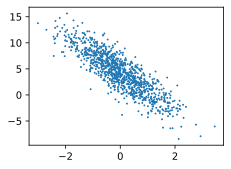

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0774, -1.7961],
        [ 1.1800,  0.1733],
        [ 0.0243,  0.3515],
        [ 0.1387,  0.7138],
        [-0.2408,  1.0425],
        [-0.0134,  0.5745],
        [-1.4394,  0.0925],
        [-0.1377, -1.1107],
        [ 0.4860,  0.8785],
        [-1.5052,  0.8035]]) 
 tensor([[10.1595],
        [ 5.9776],
        [ 3.0610],
        [ 2.0512],
        [ 0.1887],
        [ 2.2032],
        [ 0.9860],
        [ 7.7088],
        [ 2.1830],
        [-1.5381]])


In [14]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[ 0.0058],
         [-0.0054]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [15]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [16]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [17]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
X,y        

epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049


(tensor([[-0.4724, -0.1781],
         [ 0.1331, -0.5238],
         [ 0.7099, -0.2859],
         [ 0.5554, -0.2104],
         [ 0.1980, -0.2109],
         [ 1.1689, -1.3385],
         [-0.1047, -0.6590],
         [-0.6359, -1.2106],
         [-2.5197,  1.0093],
         [-0.1327,  0.6071]]),
 tensor([[ 3.8463],
         [ 6.2439],
         [ 6.5951],
         [ 6.0197],
         [ 5.3082],
         [11.0731],
         [ 6.2584],
         [ 7.0450],
         [-4.2879],
         [ 1.8640]]))

In [21]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-6.1750e-05,  4.4656e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([6.1035e-05], grad_fn=<RsubBackward1>)
